In [1]:
import pandas as pd
from finta import TA
import numpy as np
from pathlib import Path

In [2]:
#yahoo finance stock data (for longer timeframe)
import yfinance as yf

def stock_df(ticker, start, end):
    stock = yf.Ticker(ticker)
    stock_df = stock.history(start = start, end = end)
    return stock_df

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('today')
                     
spy_df = stock_df('SPY', start, end)

len(spy_df)

1770

In [3]:
#Find the daily return of the stock in percentage

# spy_df["Monetary Gain"] = spy_df["Close"].diff()
spy_df['Actual Return'] = spy_df["Close"].pct_change()

#Buy signal for price change >1%
#Sell signal for price change <0%
#Hold Signal for price change is between 0% and 1%
spy_df.loc[(spy_df['Actual Return']*100 > 1), 'Return Direction'] = 1
spy_df.loc[(spy_df['Actual Return']*100  < 1), 'Return Direction'] = 0
spy_df.loc[(spy_df['Actual Return']*100 < 0), "Return Direction"] = -1



# spy_df['Trades'] = np.abs(spy_df['Trading Signal'].diff())
# spy_df['Strategy Returns'] = spy_df['Actual Return'] * spy_df['Trading Signal'].shift()

spy_df.dropna(inplace= True)

display(spy_df.head(10))
display(spy_df.tail(10))

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Return,Return Direction
Date,,,,,,,,,
2015-01-05,179.236555,179.412128,176.760943,177.085754,169632600,0.0,0,-0.018059,-1.0
2015-01-06,177.410546,177.963614,174.575001,175.417770,209151400,0.0,0,-0.009419,-1.0
2015-01-07,176.822357,177.963602,176.348308,177.603668,125346700,0.0,0,0.012461,1.0
2015-01-08,179.096043,180.983491,179.078495,180.755234,147217800,0.0,0,0.017745,1.0
2015-01-09,181.194197,181.211758,178.657127,179.306763,158567300,0.0,0,-0.008013,-1.0
2015-01-12,179.447236,179.614035,177.261313,177.902161,144396100,0.0,0,-0.007834,-1.0
2015-01-13,179.192616,180.386531,176.023473,177.401749,214553300,0.0,0,-0.002813,-1.0
2015-01-14,175.268541,176.541476,174.320443,176.330780,192991100,0.0,0,-0.006037,-1.0
2015-01-15,177.006734,177.340319,174.592567,174.715469,176613900,0.0,0,-0.009161,-1.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Return,Return Direction
Date,,,,,,,,,
2021-12-29,476.980011,478.559998,475.920013,477.480011,54503000,0.0,0,0.001279,0.0
2021-12-30,477.929993,479.000000,475.670013,476.160004,55329000,0.0,0,-0.002765,-1.0
2021-12-31,475.640015,476.859985,474.670013,474.959991,65210500,0.0,0,-0.002520,-1.0
2022-01-03,476.299988,477.850006,473.850006,477.709991,72668200,0.0,0,0.005790,0.0
2022-01-04,479.220001,479.980011,475.579987,477.549988,71178700,0.0,0,-0.000335,-1.0
2022-01-05,477.160004,477.980011,468.279999,468.380005,104538900,0.0,0,-0.019202,-1.0
2022-01-06,467.890015,470.820007,465.429993,467.940002,86858900,0.0,0,-0.000939,-1.0
2022-01-07,467.950012,469.200012,464.649994,466.089996,85064800,0.0,0,-0.003954,-1.0
2022-01-10,462.700012,465.739990,456.600006,465.510010,119362000,0.0,0,-0.001244,-1.0


In [4]:
#Adding Technical indicators

spy_technical_indicators = pd.DataFrame()

spy_technical_indicators["close"] = spy_df["Close"]
spy_technical_indicators["Actual Return"] = spy_df["Actual Return"]
spy_technical_indicators["Signal"] = spy_df["Return Direction"]



#Creating Volume Weighted Average Price 'VWAP'  -- Trend Indicator
spy_technical_indicators['VWAP'] = TA.VWAP(spy_df)
spy_technical_indicators["VWAP Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["VWAP"] < spy_technical_indicators["close"], 'VWAP Evaluation'] = "Sell"
spy_technical_indicators.loc[spy_technical_indicators["VWAP"] > spy_technical_indicators["close"], 'VWAP Evaluation'] = "Buy"

spy_technical_indicators["VWAP Lag"] = spy_technical_indicators["VWAP Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "VWAP Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "VWAP Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "VWAP Evaluation"] = "VWAP Bearish Signal"
    if (spy_technical_indicators.loc[index, "VWAP Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "VWAP Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "VWAP Evaluation"] = "VWAP Buillish Signal"

spy_technical_indicators.drop(columns = ["VWAP Lag"], inplace = True)



#Creating Exponential Moving Average 'EMA' short(9-days) and long(70-days) for DMAC trading algorithm -- Trend Indicator
spy_technical_indicators['EMA_short'] = TA.EMA(spy_df, 9)
spy_technical_indicators['EMA_long'] = TA.EMA(spy_df, 70)
spy_technical_indicators["DMAC Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["EMA_short"] < spy_technical_indicators["EMA_long"], 'DMAC Evaluation'] = "Sell"
spy_technical_indicators.loc[spy_technical_indicators["EMA_short"] > spy_technical_indicators["EMA_long"], 'DMAC Evaluation'] = "Buy"

spy_technical_indicators["DMAC Lag"] = spy_technical_indicators["DMAC Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "DMAC Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "DMAC Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "DMAC Evaluation"] = "DMAC Bearish Signal"
    if (spy_technical_indicators.loc[index, "DMAC Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "DMAC Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "DMAC Evaluation"] = "DMAC Buillish Signal"

spy_technical_indicators.drop(columns = ["DMAC Lag"], inplace = True)



#Creating Bollinger Bands 'BBANDS'  -- Volatility Indicator
bbands_df = TA.BBANDS(spy_df)
spy_technical_indicators = pd.concat([spy_technical_indicators, bbands_df], axis=1)
spy_technical_indicators["BBbands Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["BB_UPPER"] < spy_technical_indicators["close"], 'BBbands Evaluation'] = "Sell"
spy_technical_indicators.loc[spy_technical_indicators["BB_LOWER"] > spy_technical_indicators["close"], 'BBbands Evaluation'] = "Buy"

spy_technical_indicators["BBbands Lag"] = spy_technical_indicators["BBbands Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "BBbands Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "BBbands Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "BBbands Evaluation"] = "BBbands Bearish Signal"
    if (spy_technical_indicators.loc[index, "BBbands Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "BBbands Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "BBbands Evaluation"] = "BBbands Buillish Signal"

spy_technical_indicators.drop(columns = ["BBbands Lag"], inplace = True)



#Creating Elder's Force Index 'EFI'  -- Volatility Indicator
spy_technical_indicators['EFI'] = TA.EFI(spy_df)
spy_technical_indicators["EFI Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["EFI"] < 0, 'EFI Evaluation'] = "Buy"
spy_technical_indicators.loc[spy_technical_indicators["EFI"] > 0, 'EFI Evaluation'] = "Sell"

spy_technical_indicators["EFI Lag"] = spy_technical_indicators["EFI Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "EFI Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "EFI Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "EFI Evaluation"] = "EFI Bearish Signal"
    if (spy_technical_indicators.loc[index, "EFI Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "EFI Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "EFI Evaluation"] = "EFI Buillish Signal"

spy_technical_indicators.drop(columns = ["EFI Lag"], inplace = True)


display(spy_technical_indicators.head(10))
display(spy_technical_indicators.tail(10))

,close,Actual Return,Signal,VWAP,VWAP Evaluation,EMA_short,EMA_long,DMAC Evaluation,BB_UPPER,BB_MIDDLE,BB_LOWER,BBbands Evaluation,EFI,EFI Evaluation
Date,,,,,,,,,,,,,,
2015-01-05,177.085754,-0.018059,-1.0,177.752942,Buy,177.085754,177.085754,Hold,NaN,NaN,NaN,Hold,NaN,Hold
2015-01-06,175.417770,-0.009419,-1.0,176.777001,Buy,176.159097,176.239848,Sell,NaN,NaN,NaN,Hold,-3.488612e+08,Buy
2015-01-07,177.603668,0.012461,1.0,176.908330,Sell,176.751134,176.707505,Buy,NaN,NaN,NaN,Hold,-1.347705e+07,Buy
2015-01-08,180.755234,0.017745,1.0,177.668679,Sell,178.107536,177.763212,Buy,NaN,NaN,NaN,Hold,1.707335e+08,Sell
2015-01-09,179.306763,-0.008013,-1.0,178.071313,Sell,178.464279,178.089811,Buy,NaN,NaN,NaN,Hold,4.644219e+07,Sell
2015-01-12,177.902161,-0.007834,-1.0,178.099737,Buy,178.311914,178.056260,Buy,NaN,NaN,NaN,Hold,-1.982691e+07,Buy
2015-01-13,177.401749,-0.002813,-1.0,178.069912,Buy,178.081575,177.954556,Buy,NaN,NaN,NaN,Hold,-4.055083e+07,Buy
2015-01-14,176.330780,-0.006037,-1.0,177.738446,Buy,177.660826,177.730716,Sell,NaN,NaN,NaN,Hold,-7.650659e+07,Buy
2015-01-15,174.715469,-0.009161,-1.0,177.487153,Buy,176.980434,177.356143,Sell,NaN,NaN,NaN,Hold,-1.185950e+08,Buy


,close,Actual Return,Signal,VWAP,VWAP Evaluation,EMA_short,EMA_long,DMAC Evaluation,BB_UPPER,BB_MIDDLE,BB_LOWER,BBbands Evaluation,EFI,EFI Evaluation
Date,,,,,,,,,,,,,,
2021-12-29,477.480011,0.001279,0.0,254.495183,Sell,470.794040,456.994931,Buy,480.692860,464.515894,448.338927,Hold,5.447589e+07,Sell
2021-12-30,476.160004,-0.002765,-1.0,254.571598,Sell,471.867232,457.534793,Buy,481.084370,465.877753,450.671135,Hold,3.626010e+07,Sell
2021-12-31,474.959991,-0.002520,-1.0,254.661008,Sell,472.485784,458.025643,Buy,481.780892,466.835818,451.890745,Hold,1.990103e+07,Sell
2022-01-03,477.709991,0.005790,0.0,254.760996,Sell,473.530626,458.580132,Buy,482.051323,468.129687,454.208052,Hold,4.560624e+07,Sell
2022-01-04,477.549988,-0.000335,-1.0,254.859392,Sell,474.334498,459.114494,Buy,482.672224,469.147997,455.623769,Hold,3.746409e+07,Sell
2022-01-05,468.380005,-0.019202,-1.0,254.999758,Sell,473.143599,459.375494,Buy,482.713597,469.234967,455.756337,Hold,-1.048336e+08,Buy
2022-01-06,467.940002,-0.000939,-1.0,255.114373,Sell,472.102880,459.616748,Buy,482.715462,469.238156,455.760850,Hold,-9.531713e+07,Buy
2022-01-07,466.089996,-0.003954,-1.0,255.225755,Sell,470.900303,459.799093,Buy,482.700883,469.306789,455.912694,Hold,-1.041819e+08,Buy
2022-01-10,465.510010,-0.001244,-1.0,255.378873,Sell,469.822245,459.959964,Buy,482.629242,469.127692,455.626142,Hold,-9.918852e+07,Buy


In [5]:
#Drop unnecessary variables
spy_technical_indicators.drop(columns = ["close"], inplace = True)
spy_technical_indicators.drop(columns = ["Actual Return"], inplace = True)
spy_technical_indicators.drop(columns = ["BB_MIDDLE"], inplace = True)
spy_technical_indicators.drop(columns = ["BB_LOWER"], inplace = True)
spy_technical_indicators.drop(columns = ["BB_UPPER"], inplace = True)
spy_technical_indicators.dropna()


spy_technical_indicators

,Signal,VWAP,VWAP Evaluation,EMA_short,EMA_long,DMAC Evaluation,BBbands Evaluation,EFI,EFI Evaluation
Date,,,,,,,,,
2015-01-05,-1.0,177.752942,Buy,177.085754,177.085754,Hold,Hold,NaN,Hold
2015-01-06,-1.0,176.777001,Buy,176.159097,176.239848,Sell,Hold,-3.488612e+08,Buy
2015-01-07,1.0,176.908330,Sell,176.751134,176.707505,Buy,Hold,-1.347705e+07,Buy
2015-01-08,1.0,177.668679,Sell,178.107536,177.763212,Buy,Hold,1.707335e+08,Sell
2015-01-09,-1.0,178.071313,Sell,178.464279,178.089811,Buy,Hold,4.644219e+07,Sell
...,...,...,...,...,...,...,...,...,...
2022-01-05,-1.0,254.999758,Sell,473.143599,459.375494,Buy,Hold,-1.048336e+08,Buy
2022-01-06,-1.0,255.114373,Sell,472.102880,459.616748,Buy,Hold,-9.531713e+07,Buy
2022-01-07,-1.0,255.225755,Sell,470.900303,459.799093,Buy,Hold,-1.041819e+08,Buy


In [6]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

categorical_variables = list(spy_technical_indicators.dtypes[spy_technical_indicators.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['VWAP Evaluation', 'DMAC Evaluation', 'BBbands Evaluation', 'EFI Evaluation']

In [7]:

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse= False)
encoded_data = enc.fit_transform(spy_technical_indicators[categorical_variables])

encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables), index = spy_technical_indicators.index)

encoded_df = pd.concat([encoded_df, spy_technical_indicators.drop(columns = categorical_variables)], axis = 1)
encoded_df

,VWAP Evaluation_Buy,VWAP Evaluation_Sell,DMAC Evaluation_Buy,DMAC Evaluation_Hold,DMAC Evaluation_Sell,BBbands Evaluation_BBbands Bearish Signal,BBbands Evaluation_BBbands Buillish Signal,BBbands Evaluation_Buy,BBbands Evaluation_Hold,BBbands Evaluation_Sell,EFI Evaluation_Buy,EFI Evaluation_Hold,EFI Evaluation_Sell,Signal,VWAP,EMA_short,EMA_long,EFI
Date,,,,,,,,,,,,,,,,,,
2015-01-05,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,177.752942,177.085754,177.085754,NaN
2015-01-06,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,176.777001,176.159097,176.239848,-3.488612e+08
2015-01-07,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,176.908330,176.751134,176.707505,-1.347705e+07
2015-01-08,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,177.668679,178.107536,177.763212,1.707335e+08
2015-01-09,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,178.071313,178.464279,178.089811,4.644219e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,254.999758,473.143599,459.375494,-1.048336e+08
2022-01-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,255.114373,472.102880,459.616748,-9.531713e+07
2022-01-07,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,255.225755,470.900303,459.799093,-1.041819e+08


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = encoded_df.drop(columns = ["Signal"])
y = encoded_df["Signal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
neural = Sequential()

number_input_features = len(X.columns)
hidden_nodes_layer1 =  (number_input_features + 1) // 2 
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2
hidden_nodes_layer3 = (hidden_nodes_layer2 + 1) // 2

neural.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer2, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer3, activation="elu"))
neural.add(Dense(units=1, activation="linear"))

neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 162       
                                                                 
 dense_1 (Dense)             (None, 5)                 50        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [10]:
# opt = tf.keras.optimizers.SGD(lr=0.01)
neural.compile(loss = "mse", optimizer = "adam",  metrics = ["mse"])

model = neural.fit(X_train_scaled, y_train, epochs = 500)

Epoch 1/500
42/42 [==============================] - 0s 512us/step - loss: 1.4600 - mse: 1.4600
Epoch 2/500
42/42 [==============================] - 0s 488us/step - loss: 0.9410 - mse: 0.9410
Epoch 3/500
42/42 [==============================] - 0s 488us/step - loss: 0.7243 - mse: 0.7243
Epoch 4/500
42/42 [==============================] - 0s 488us/step - loss: 0.6132 - mse: 0.6132
Epoch 5/500
42/42 [==============================] - 0s 512us/step - loss: 0.5413 - mse: 0.5413
Epoch 6/500
42/42 [==============================] - 0s 488us/step - loss: 0.4921 - mse: 0.4921
Epoch 7/500
42/42 [==============================] - 0s 488us/step - loss: 0.4634 - mse: 0.4634
Epoch 8/500
42/42 [==============================] - 0s 512us/step - loss: 0.4471 - mse: 0.4471
Epoch 9/500
42/42 [==============================] - 0s 512us/step - loss: 0.4370 - mse: 0.4370
Epoch 10/500
42/42 [==============================] - 0s 488us/step - loss: 0.4326 - mse: 0.4326
Epoch 11/500
42/42 [===================

In [11]:
# Y_prediction = (neural.predict(X_train_scaled) > 0.5).astype("int32")
Y_prediction = neural.predict(X_train_scaled)
Y_prediction = Y_prediction.squeeze()

results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})
display(results)

model_loss, model_accuracy = neural.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

,Predictions,Actual
Date,,
2021-02-11,-0.443837,0.0
2021-11-18,-0.355036,0.0
2015-10-08,0.625566,0.0
2015-01-28,-0.730917,-1.0
2021-01-26,-0.332696,-1.0
...,...,...
2017-11-03,-0.374825,0.0
2018-08-08,-0.605477,-1.0
2019-05-14,0.524349,0.0


42/42 - 0s - loss: 0.3800 - mse: 0.3800 - 88ms/epoch - 2ms/step
Loss: 0.3799685537815094, MSE: 0.3799685537815094


In [12]:
Y_test_prediction = (neural.predict(X_test_scaled) > 0.5).astype("int32")
Y_test_prediction = Y_test_prediction.squeeze()

test_results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})

model_loss, model_accuracy = neural.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

14/14 - 0s - loss: nan - mse: nan - 14ms/epoch - 1ms/step
Loss: nan, Accuracy: nan


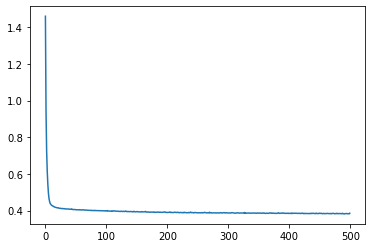

In [13]:
import matplotlib.pyplot as plt

plt.plot(model.history["loss"])

<AxesSubplot:xlabel='Date'>

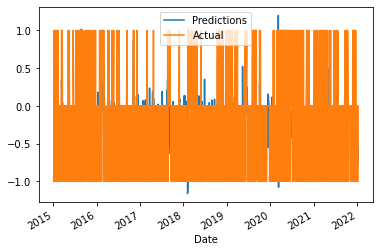

In [14]:
neural.save(Path("Files/Momentum_Indicators.h5"))

test_results.plot()